# Atividade VI - Visualização de Dados

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

plt.rcParams['figure.dpi'] = 120
sns.set_style("whitegrid")

In [ ]:
#ler dados
fn = "C:/Users/djeff/OneDrive/Documents/MeusProjetos/portifolio-de-estudos/UEPB_DataScience/P3/visualizacao_de_dados/atividade_VI/br_rf_arrecadacao_uf.csv"
df = pd.read_csv(fn, parse_dates=[['ano','mes']])  # ou parse manual depois


C:\Users\djeff\AppData\Local\Temp\ipykernel_28620\4046482619.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(fn, parse_dates=[['ano','mes']])  # ou parse manual depois
C:\Users\djeff\AppData\Local\Temp\ipykernel_28620\4046482619.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(fn, parse_dates=[['ano','mes']])  # ou parse manual depois


In [5]:
# Verificar se o dataframe foi carregado corretamente
df.head()  # Mostra as primeiras linhas

# Verificar tipos de dados e presença da coluna ano_mes
print("\n=== Informações do DataFrame ===")
df.info()

# Verificar se há colunas esperadas
print("\n=== Colunas ===")
print(df.columns.tolist())

# Verificar se há valores ausentes
print("\n=== Valores ausentes (top 10) ===")
print(df.isna().sum().sort_values(ascending=False).head(10))


=== Informações do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ano_mes                                  7911 non-null   datetime64[ns]
 1   sigla_uf                                 7911 non-null   object        
 2   imposto_importacao                       7911 non-null   object        
 3   imposto_exportacao                       7911 non-null   object        
 4   ipi_fumo                                 7911 non-null   object        
 5   ipi_bebidas                              7911 non-null   object        
 6   ipi_automoveis                           7911 non-null   object        
 7   ipi_importacoes                          7911 non-null   object        
 8   ipi_outros                               7911 non-null   object        
 9   irpf   

In [6]:
# Converter colunas numéricas que estão como texto
# Identifica as colunas de receita (todas exceto 'ano_mes' e 'sigla_uf')
cols_receita = [c for c in df.columns if c not in ['ano_mes', 'sigla_uf']]

# Remove caracteres como 'R$', '.', ',' e converte para float
for col in cols_receita:
    df[col] = (df[col]
               .astype(str)
               .str.replace('.', '', regex=False)   # remove separador de milhar
               .str.replace(',', '.', regex=False)   # troca vírgula por ponto
               .str.replace('R$', '', regex=False)   # remove símbolo de real se existir
               .str.strip())                         # remove espaços
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Confirmar se deu certo
df[cols_receita].dtypes.head(10)


imposto_importacao            int64
imposto_exportacao            int64
ipi_fumo                      int64
ipi_bebidas                   int64
ipi_automoveis                int64
ipi_importacoes               int64
ipi_outros                    int64
irpf                          int64
irpj_entidades_financeiras    int64
irpj_demais_empresas          int64
dtype: object

In [7]:
# Criar coluna com a soma de todas as receitas
df['receita_total'] = df[cols_receita].sum(axis=1)

# Conferir resultado
df[['ano_mes', 'sigla_uf', 'receita_total']].head()

,ano_mes,sigla_uf,receita_total
0,2019-01-01,AC,2.099813e+10
1,2019-02-01,AC,1.329215e+10
2,2019-03-01,AC,1.883375e+10
3,2019-09-01,AC,9.861483e+09
4,2019-06-01,AC,5.721369e+09


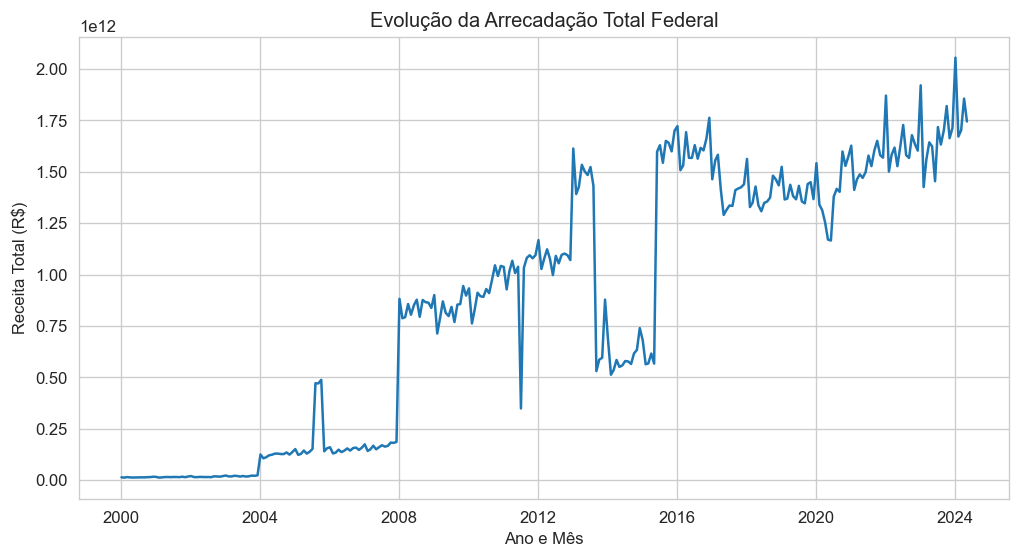

ano_mes
2023-06-01    R$ 1,453,783,981,036.00
2023-07-01    R$ 1,717,707,716,139.00
2023-08-01    R$ 1,632,303,752,534.00
2023-09-01    R$ 1,701,003,246,011.00
2023-10-01    R$ 1,819,377,637,979.00
2023-11-01    R$ 1,663,401,295,351.00
2023-12-01    R$ 1,713,058,986,203.00
2024-01-01    R$ 2,054,897,057,035.00
2024-02-01    R$ 1,671,098,095,704.00
2024-03-01    R$ 1,701,266,404,486.00
2024-04-01    R$ 1,855,918,316,695.00
2024-05-01    R$ 1,744,443,978,428.00
Name: receita_total, dtype: object


In [10]:
import matplotlib.pyplot as plt

receita_mensal = df.groupby('ano_mes')['receita_total'].sum()

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(receita_mensal.index, receita_mensal.values)
plt.title('Evolução da Arrecadação Total Federal')
plt.xlabel('Ano e Mês')
plt.ylabel('Receita Total (R$)')
plt.grid(True)
plt.show()

print(receita_mensal.tail(12).apply(lambda x: f'R$ {x:,.2f}'))  # últimos 12 meses formatados


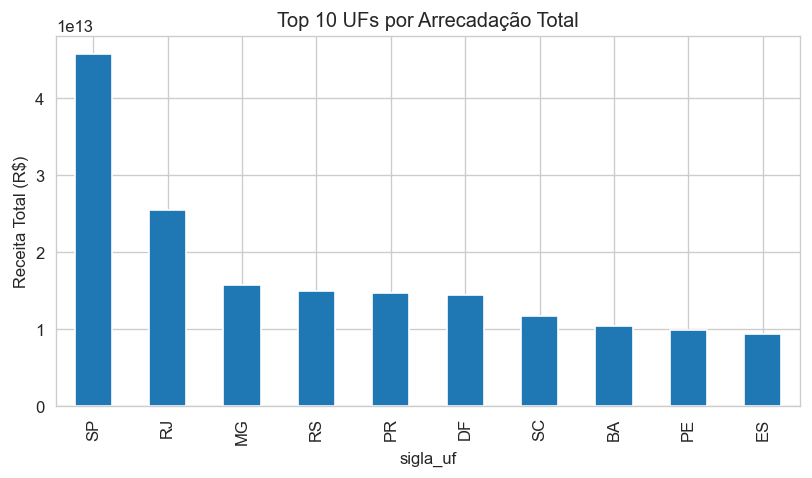

sigla_uf
SP    R$ 45,770,518,828,219.00
RJ    R$ 25,473,464,705,817.00
MG    R$ 15,658,344,065,054.00
RS    R$ 14,856,662,548,181.00
PR    R$ 14,623,283,368,089.00
DF    R$ 14,445,144,469,309.00
SC    R$ 11,666,626,031,328.00
BA    R$ 10,390,733,879,960.00
PE     R$ 9,849,621,499,163.00
ES     R$ 9,318,715,366,243.00
Name: receita_total, dtype: object


In [11]:
receita_uf = df.groupby('sigla_uf')['receita_total'].sum().sort_values(ascending=False)

# Gráfico
receita_uf.head(10).plot(kind='bar', figsize=(8,4), title='Top 10 UFs por Arrecadação Total')
plt.ylabel('Receita Total (R$)')
plt.show()

# Tabela
print(receita_uf.head(10).apply(lambda x: f'R$ {x:,.2f}'))

,receita_total
ano_mes,
2022-06-01,"R$ 1,624,422,758,167.00"
2022-07-01,"R$ 1,727,669,102,052.00"
2022-08-01,"R$ 1,580,567,454,765.00"
2022-09-01,"R$ 1,567,148,928,548.00"
2022-10-01,"R$ 1,677,831,791,364.00"
2022-11-01,"R$ 1,634,348,239,373.00"
2022-12-01,"R$ 1,602,862,372,767.00"
2023-01-01,"R$ 1,920,217,271,112.00"
2023-02-01,"R$ 1,425,356,214,730.00"


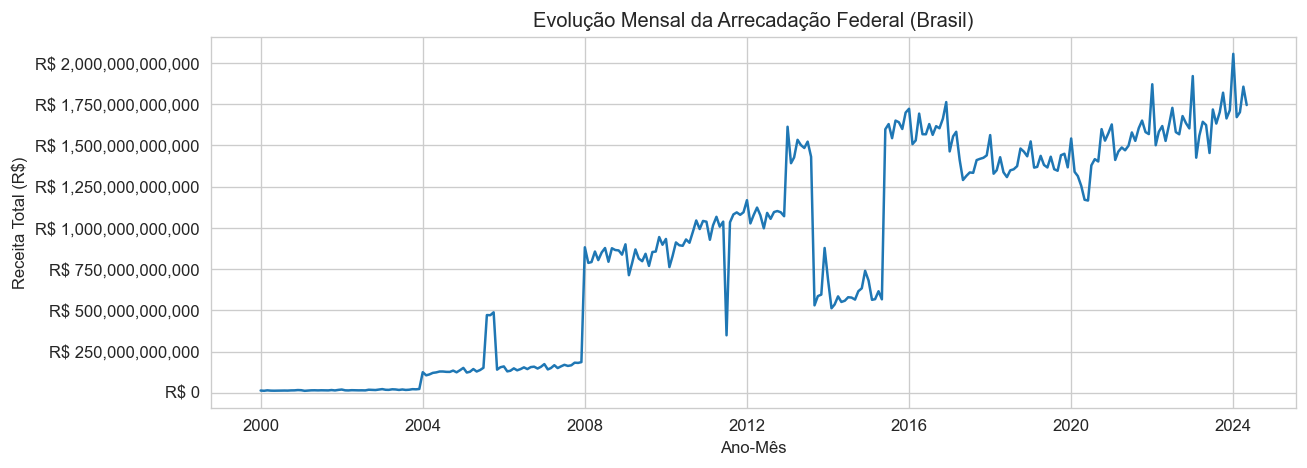

In [12]:
#série mensal nacional + tabela dos últimos 24 meses
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# agregação mensal nacional
receita_mensal = df.groupby('ano_mes', as_index=True)['receita_total'].sum().sort_index()

# tabela (últimos 24 meses)
pd.options.display.float_format = 'R$ {:,.2f}'.format
ult_24 = receita_mensal.tail(24).to_frame(name='receita_total')
display(ult_24)

# plot (matplotlib, sem seleção de cores explícitas)
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(receita_mensal.index, receita_mensal.values)
ax.set_title('Evolução Mensal da Arrecadação Federal (Brasil)')
ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Receita Total (R$)')
ax.grid(True)
# formatação eixo y para leitura rápida (em bilhões/trilhões)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'R$ {x:,.0f}'))
plt.tight_layout()
plt.show()

,receita_media
Jan,"R$ 954,600,765,175.16"
Fev,"R$ 813,898,661,037.20"
Mar,"R$ 842,318,120,225.04"
Abr,"R$ 881,352,606,739.88"
Mai,"R$ 837,146,482,056.40"
Jun,"R$ 839,378,596,234.83"
Jul,"R$ 859,869,789,320.79"
Ago,"R$ 868,486,638,825.38"
Set,"R$ 859,846,889,755.58"
Out,"R$ 897,028,238,139.50"


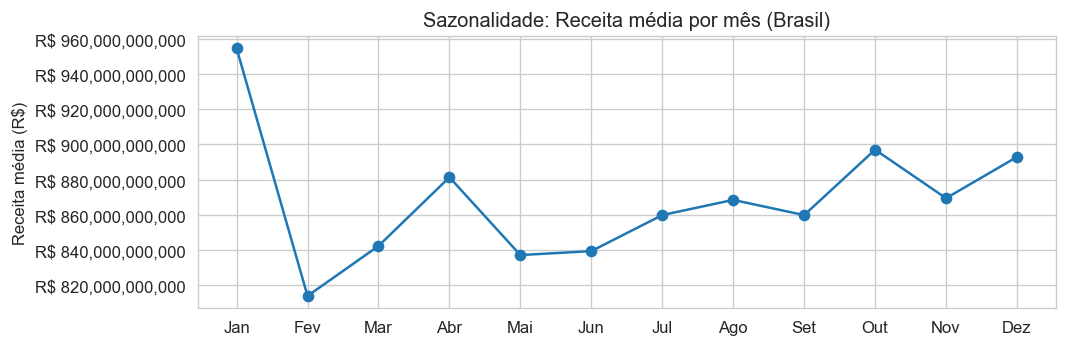

In [13]:
#média por mês do ano (sazonalidade)
sazonal = receita_mensal.reset_index()
sazonal['mes_num'] = sazonal['ano_mes'].dt.month
sazonal_media = sazonal.groupby('mes_num')['receita_total'].mean().reindex(range(1,13))
sazonal_media.index = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

display(sazonal_media.to_frame(name='receita_media'))

# plot linha
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(sazonal_media.index, sazonal_media.values, marker='o')
ax.set_title('Sazonalidade: Receita média por mês (Brasil)')
ax.set_ylabel('Receita média (R$)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'R$ {x:,.0f}'))
plt.tight_layout()
plt.show()


,receita_total
sigla_uf,
SP,"R$ 45,770,518,828,219.00"
RJ,"R$ 25,473,464,705,817.00"
MG,"R$ 15,658,344,065,054.00"
RS,"R$ 14,856,662,548,181.00"
PR,"R$ 14,623,283,368,089.00"
DF,"R$ 14,445,144,469,309.00"
SC,"R$ 11,666,626,031,328.00"
BA,"R$ 10,390,733,879,960.00"
PE,"R$ 9,849,621,499,163.00"


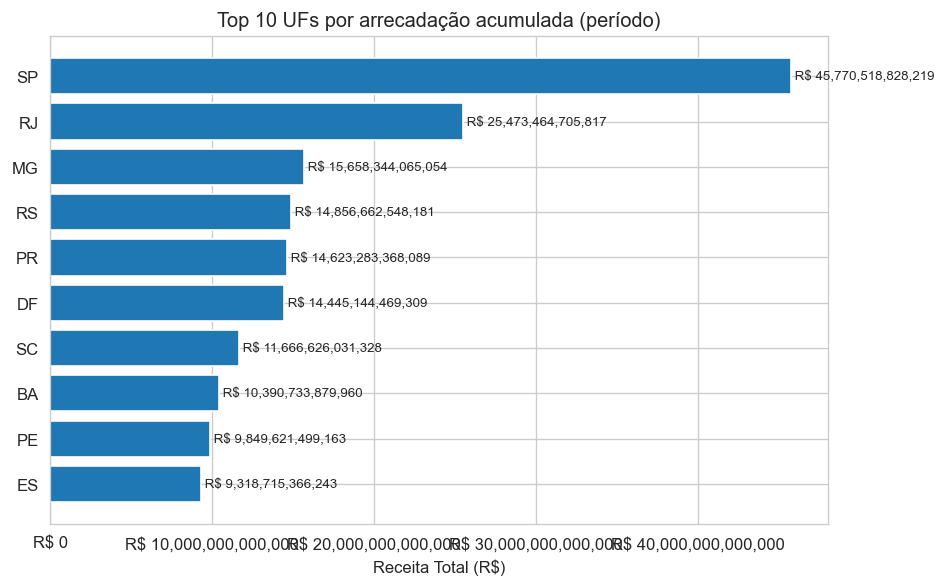

In [14]:
#ranking top 10 UFs por arrecadação acumulada
receita_uf = df.groupby('sigla_uf', as_index=True)['receita_total'].sum().sort_values(ascending=False)
top10 = receita_uf.head(10)
# tabela
display(top10.to_frame(name='receita_total'))

# plot barras horizontal com anotação dos valores
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.barh(top10.index[::-1], top10.values[::-1])
ax.set_title('Top 10 UFs por arrecadação acumulada (período)')
ax.set_xlabel('Receita Total (R$)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'R$ {x:,.0f}'))
# valores sobre barras
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
            f' R$ {bar.get_width():,.0f}', va='center', fontsize=8)
plt.tight_layout()
plt.show()


sigla_uf,BA,SP
ano_mes,,
2015,"R$ 551,141,028,570.00","R$ 3,155,618,346,487.00"
2016,"R$ 763,983,999,173.00","R$ 3,587,601,322,478.00"
2017,"R$ 759,911,595,637.00","R$ 2,510,359,542,908.00"
2018,"R$ 718,507,379,130.00","R$ 2,395,765,728,847.00"
2019,"R$ 706,125,844,629.00","R$ 2,377,564,814,271.00"
2020,"R$ 661,005,030,037.00","R$ 2,501,174,413,989.00"
2021,"R$ 663,333,751,051.00","R$ 2,910,179,579,963.00"
2022,"R$ 707,044,738,385.00","R$ 3,219,684,480,419.00"
2023,"R$ 715,411,364,315.00","R$ 3,420,804,179,643.00"


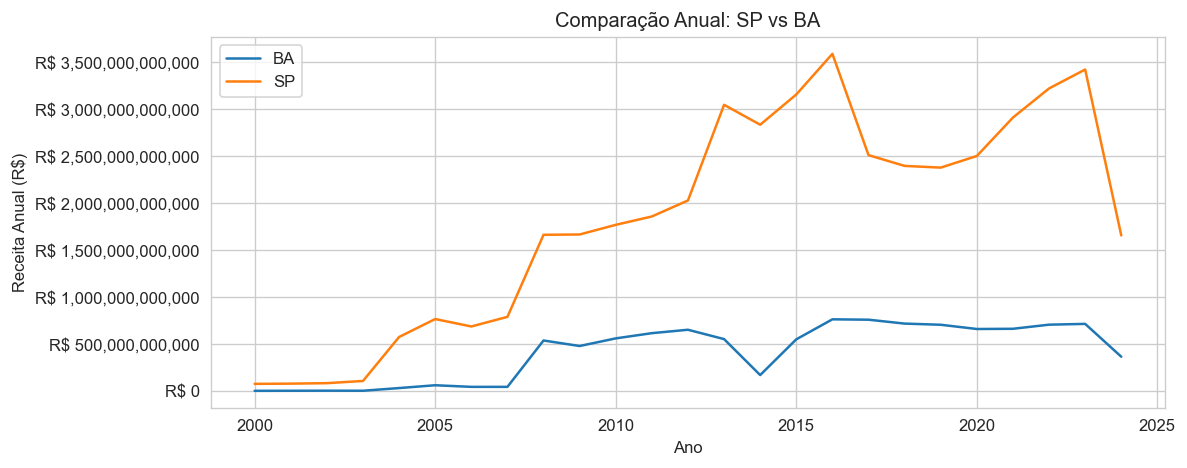

In [15]:
#comparação anual SP vs BA (ou troque UFs)
ufs = ['SP','BA']  # ajuste se preferir outras UFs
comp = df[df['sigla_uf'].isin(ufs)].copy()
comp_ano = comp.groupby([comp['ano_mes'].dt.year, 'sigla_uf'])['receita_total'].sum().unstack().fillna(0)

display(comp_ano.tail(10))  # últimos 10 anos (ou menos se período menor)

# plot linhas (cada UF)
fig, ax = plt.subplots(figsize=(10,4))
for uf in comp_ano.columns:
    ax.plot(comp_ano.index, comp_ano[uf], label=uf)
ax.set_title('Comparação Anual: ' + ' vs '.join(ufs))
ax.set_xlabel('Ano')
ax.set_ylabel('Receita Anual (R$)')
ax.legend()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'R$ {x:,.0f}'))
plt.tight_layout()
plt.show()


,ipi_fumo,ipi_bebidas,ipi_automoveis
ano_mes,,,
2015,29775281304,114243591927,102301971713
2016,73276287414,227863770525,188030521326
2017,122786352900,248625750723,204430425487
2018,111855515725,205777186918,188894661321
2019,69830042661,268378418666,203370953173
2020,65732252834,253640244960,141045076195
2021,106125974917,216797639560,138090674281
2022,71092101309,186469348865,127307828993
2023,24656485392,242547316408,173852322651


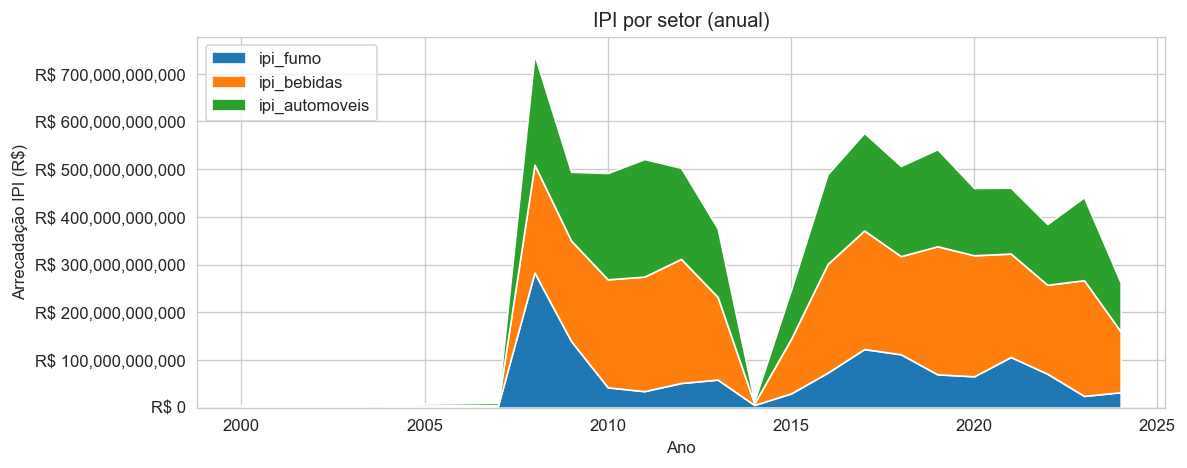

In [16]:
#IPI setorial anual (fumo, bebidas, automóveis)
ipi_cols = [c for c in ['ipi_fumo','ipi_bebidas','ipi_automoveis'] if c in df.columns]
ipi_ano = df.groupby(df['ano_mes'].dt.year)[ipi_cols].sum()
display(ipi_ano.tail(10))  # tabela anual

# stack area plot (matplotlib)
fig, ax = plt.subplots(figsize=(10,4))
ax.stackplot(ipi_ano.index, [ipi_ano[c] for c in ipi_cols], labels=ipi_cols)
ax.set_title('IPI por setor (anual)')
ax.set_xlabel('Ano')
ax.set_ylabel('Arrecadação IPI (R$)')
ax.legend(loc='upper left')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'R$ {x:,.0f}'))
plt.tight_layout()
plt.show()


C:\Users\djeff\AppData\Local\Temp\ipykernel_28620\3625299046.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(pd.concat([parts_s.rename('valor'), parts_pct.rename('pct')], axis=1).applymap(lambda x: f'R$ {x:,.2f}' if isinstance(x, (int,float)) and x>1 else (f'{x:.1f}%' if isinstance(x, (int,float)) else x)))


,valor,pct
Impostos,"R$ 94,724,119,935.00",R$ 40.65
Contribuições,0.0%,0.0%
Previdenciária,"R$ 98,229,741,301.00",R$ 42.16
Outras,"R$ 40,052,994,127.00",R$ 17.19


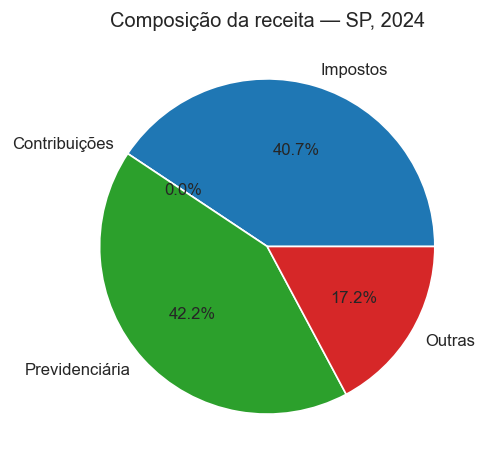

In [17]:
#composição percentual de receitas para SP (ano mais recente disponível)
ano_ref = int(df['ano_mes'].dt.year.max())
uf_chave = 'SP'  # troque se quiser outra UF
sp_ano = df[(df['sigla_uf']==uf_chave) & (df['ano_mes'].dt.year==ano_ref)]

# Defina os grupos conforme as colunas do seu dataset
impostos_cols = [c for c in ['imposto_importacao','imposto_exportacao','irpf','irpj_demais_empresas','irpj_entidades_financeiras'] if c in df.columns]
contribs_cols = [c for c in ['cofins','pis_pasep','csll'] if c in df.columns]
previd_cols = [c for c in ['receita_previdenciaria','receita_previdenciaria_propria','receita_previdenciaria_demais'] if c in df.columns]
outras_cols = [c for c in ['outras_receitas_rfb','demais_receitas','receitas_outros_orgaos'] if c in df.columns]

parts = {
    'Impostos': sp_ano[impostos_cols].sum(axis=1).sum() if impostos_cols else 0,
    'Contribuições': sp_ano[contribs_cols].sum(axis=1).sum() if contribs_cols else 0,
    'Previdenciária': sp_ano[previd_cols].sum(axis=1).sum() if previd_cols else 0,
    'Outras': sp_ano[outras_cols].sum(axis=1).sum() if outras_cols else 0
}

# tabela e porcentagem
parts_s = pd.Series(parts)
parts_pct = parts_s / parts_s.sum() * 100
display(pd.concat([parts_s.rename('valor'), parts_pct.rename('pct')], axis=1).applymap(lambda x: f'R$ {x:,.2f}' if isinstance(x, (int,float)) and x>1 else (f'{x:.1f}%' if isinstance(x, (int,float)) else x)))

# pie chart
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(parts_s.values, labels=parts_s.index, autopct='%1.1f%%')
ax.set_title(f'Composição da receita — {uf_chave}, {ano_ref}')
plt.tight_layout()
plt.show()
